In [5]:
import pandas as pd

# Python code used for the simulation and analysis
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, adfuller

# Parameters
theta_values = [0.2, 0.9,0.0]
mu = 0.05
sigma = 0.1  # Standard deviation of epsilon
n_total = 250
burn_in = 50
n_simulated = n_total - burn_in

# Initialize a dictionary to store the simulated data
simulations = {}

# Simulate the process for both theta values
np.random.seed(42)  # For reproducibility
for theta in theta_values:
    r = np.zeros(n_total)  # Initialize the time series
    epsilon = np.random.normal(0, sigma, n_total)  # Generate noise
    for t in range(1, n_total):
        r[t] = mu + epsilon[t] + theta * r[t-1]  # AR(1) process
    simulations[theta] = r[burn_in:]  # Discard the first 50 observations

# Perform ADF tests on simulated data
adf_results = {theta: adfuller(data) for theta, data in simulations.items()}

In [6]:
# Extract relevant ADF test results
adf_summary = {
    theta: {
        "ADF Statistic": result[0],
        "p-value": result[1],
        "Critical Values": result[4],
        "Stationary": result[1] < 0.05
    }
    for theta, result in adf_results.items()
}

# Extract autocorrelations
autocorrelations = {theta: acf(data, fft=False, nlags=10) for theta, data in simulations.items()}

In [7]:
# Create a DataFrame to summarize the results
adf_results_table = pd.DataFrame({
    "Theta": list(adf_summary.keys()),
    "ADF Statistic": [result["ADF Statistic"] for result in adf_summary.values()],
    "p-value": [result["p-value"] for result in adf_summary.values()],
    "Critical Value (5%)": [result["Critical Values"]["5%"] for result in adf_summary.values()],
    "Stationary": ["Yes" if result["Stationary"] else "No" for result in adf_summary.values()],
})

ADF Test Results:
   Theta  ADF Statistic       p-value  Critical Value (5%) Stationary
0    0.2     -12.530779  2.431367e-23            -2.876176        Yes
1    0.9      -3.527948  7.297675e-03            -2.876251        Yes
2    0.0     -14.489053  6.191633e-27            -2.876176        Yes


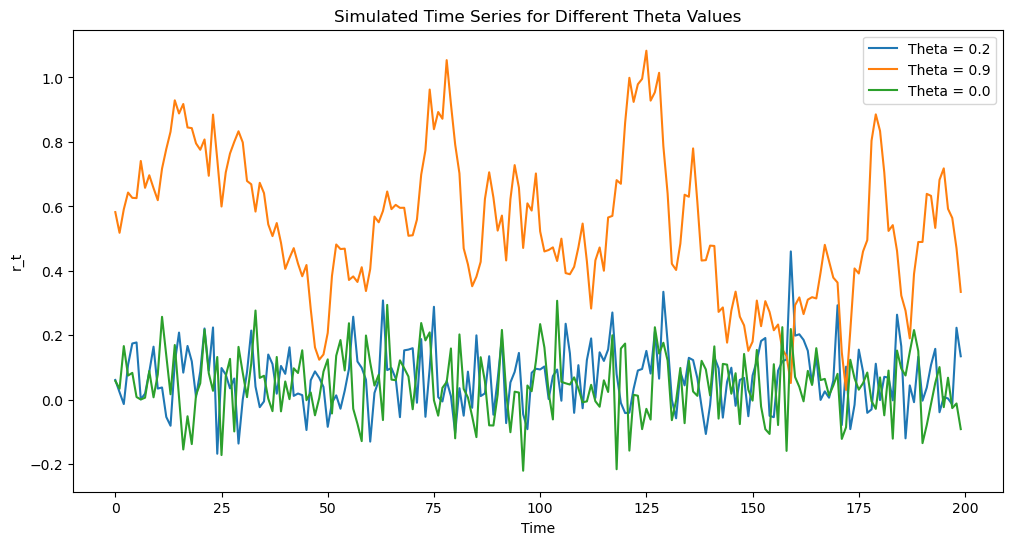

,Theta,ADF Statistic,p-value,Critical Value (5%),Stationary
0,0.2,-12.530779,2.431367e-23,-2.876176,Yes
1,0.9,-3.527948,7.297675e-03,-2.876251,Yes
2,0.0,-14.489053,6.191633e-27,-2.876176,Yes


In [8]:
# Display the table
print("ADF Test Results:")
print(adf_results_table)

# Plot the simulated series
plt.figure(figsize=(12, 6))
for theta, data in simulations.items():
    plt.plot(data, label=f'Theta = {theta}')
plt.title('Simulated Time Series for Different Theta Values')
plt.xlabel('Time')
plt.ylabel('r_t')
plt.legend()
plt.show()

# Tabulated results as output
adf_results_table